# Waveform
It is a popular simulated example, taken from Breiman et al. (1984, pages 49–55), and used in Hastie and Tibshirani (1996b) and elsewhere. It is a three-class problem with 21 variables, and is considered to be a difficult pattern recognition problem. The
predictors are defined by

\begin{array}{rlrl}{X_{j}} & {=U h_{1}(j)+(1-U) h_{2}(j)+\epsilon_{j}} & {\text { Class } 1} \\ {X_{j}} & {=U h_{1}(j)+(1-U) h_{3}(j)+\epsilon_{j}} & {\text { Class } 2} \\ {X_{j}} & {=U h_{2}(j)+(1-U) h_{3}(j)+\epsilon_{j}} & {\text { Class } 3}\end{array}

where j = 1, 2,... , 21, U is uniform on (0, 1), $\epsilon_{j}$ are standard normal variates, and the $h_ℓ$ are the shifted triangular waveforms: $h_{1}(j)=\max (6-|j-11|, 0), h_{2}(j)=h_{1}(j-4) \text { and } h_{3}(j)=h_{1}(j+4)$.

The dataset provides an instance of 300 training observations and 500 test observations.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

np.warnings.filterwarnings('ignore')
%matplotlib inline

# define plots common properties and color constants
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
GRAY1, GRAY4, GRAY7 = '#231F20', '#646369', '#929497'

## Load and Prepare Data

In [2]:
data = pd.read_csv("../data/waveform.txt", sep='\t')
data.head()

,is_test,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,...,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21
0,0,1,2,-1.4854,0.3470,1.6592,1.2570,1.3945,4.3182,3.9421,...,4.2555,1.5460,1.0990,0.0588,2.0671,-0.9759,-1.0614,-0.8499,1.0453,-0.6089
1,0,2,1,-0.9938,1.2748,-1.1977,-0.3464,-0.3442,1.2738,0.1725,...,2.8144,4.8261,5.9428,4.4309,5.2562,3.6981,2.7722,3.4906,0.7623,-0.5920
2,0,3,1,-0.2120,-0.5239,-0.6108,2.5555,-0.1607,0.2911,0.7401,...,4.3555,3.5097,4.2721,6.7883,3.0623,3.3953,1.5929,3.0073,2.7663,-0.7788
3,0,4,1,-0.4256,-0.8360,0.4756,-0.7948,-1.8930,-0.0541,-1.8688,...,3.7252,2.3957,4.0405,5.1305,5.2005,2.9713,2.6089,1.0063,1.3321,-0.1967
4,0,5,2,1.0515,-0.5382,-1.3438,0.9739,0.3659,1.8218,4.8663,...,4.6134,2.5792,2.9855,2.8388,0.1155,-1.3772,-1.5039,2.0517,0.2095,-1.7289


In [3]:
target = 'y'
features = [f'x.{i}' for i in range(1, 22)]
X = data[features].values
y = data[target].values
is_test = data.is_test.values
# split data by is_test flag
X_train, X_test = X[is_test == 0], X[is_test == 1]
y_train, y_test = y[is_test == 0], y[is_test == 1]

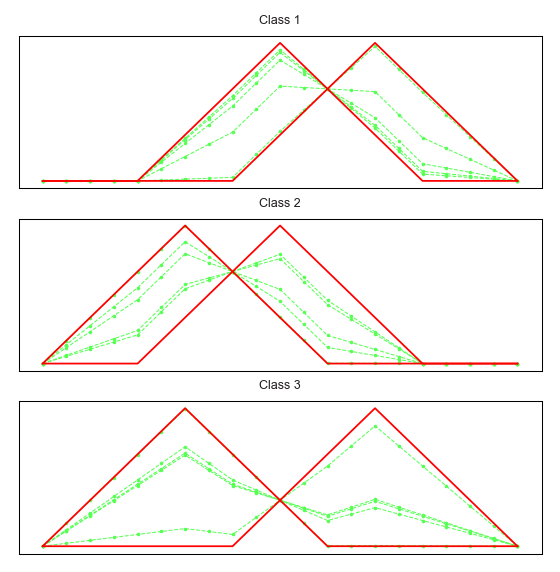

In [4]:
# PAGE 453. FIGURE 12.14. Some examples of the waveforms generated from model
#           (12.64) before the Gaussian noise is added.
def h1(j): return max(6 - abs(j - 11), 0)
def h2(j): return h1(j - 4)
def h3(j): return h1(j + 4)

def gen_sample(first_fnc, second_fnc, U):
    return [U*first_fnc(j) + (1-U)*second_fnc(j) for j in range(1, 22)]

def gen_rnd_sample(first_fnc, second_fnc):
    return gen_sample(first_fnc, second_fnc, np.random.uniform())

class_fncs = ((h1, h2), (h1, h3), (h2, h3))

fig, axarr = plt.subplots(3, 1, figsize=(4.5, 4.57), dpi=150)
plt.subplots_adjust(wspace=0.1)

x_plt = list(range(1, 22))
for cls in range(3):
    fncs = class_fncs[cls]
    ax = axarr[cls]
    plt.axes(ax)
    ax.tick_params(
        bottom=False, labelbottom=False, left=False, labelleft=False)
    plt.title(f'Class {cls+1}', fontsize=6, color=GRAY1)
    for i in range(5):
        sample = gen_rnd_sample(*fncs)
        ax.plot(x_plt, sample, color='#57FF54', linewidth=0.5, linestyle='--')
        ax.scatter(x_plt, sample, color='#57FF54', s=0.5)
    ax.plot(x_plt, gen_sample(*fncs, 0), color='red', linewidth=0.85)
    ax.plot(x_plt, gen_sample(*fncs, 1), color='red', linewidth=0.85)

## LDA & QDA

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [6]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

lda_train_er = 1 - accuracy_score(y_train, lda.predict(X_train))
qda_train_er = 1 - accuracy_score(y_train, qda.predict(X_train))
lda_test_er = 1 - accuracy_score(y_test, lda.predict(X_test))
qda_test_er = 1 - accuracy_score(y_test, qda.predict(X_test))
print(f'LDA Error Rate: Training {lda_train_er:.2f}, Test {lda_test_er:.2f}')
print(f'QDA Error Rate: Training {qda_train_er:.2f}, Test {qda_test_er:.2f}')

LDA Error Rate: Training 0.15, Test 0.21
QDA Error Rate: Training 0.05, Test 0.22


## Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtc = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

dtc_train_er = 1 - accuracy_score(y_train, dtc.predict(X_train))
dtc_test_er = 1 - accuracy_score(y_test, dtc.predict(X_test))
print(f'Decision Tree Error Rate: Training {dtc_train_er:.2f}, Test {dtc_test_er:.2f}')

Decision Tree Error Rate: Training 0.07, Test 0.29


## FDA/MARS
I have not found the flexible discriminant analysis implementation for Python. Implemented it myself. The result is close to the values from the book, but slightly worse. Maybe I made some mistakes. More research and testing is needed. The approch is explained here https://www.researchgate.net/publication/2889611_Flexible_Discriminant_Analysis_by_Optimal_Scoring.

In [9]:
from sklearn.preprocessing import OneHotEncoder
from pyearth import Earth

In [10]:
# let's implement our flexible discriminant classifier
class FlexibleDiscriminantAnalysis():
    def __init__(self, model, n_components=None):
        self.model = model
        self.n_components = n_components

    def fit(self, X, y):
        _, counts_elements = np.unique(y, return_counts=True)
        priors = counts_elements/y.shape[0]
        # PAGE 440. We create an N × K indicator response matrix Y
        Y = OneHotEncoder(
            categories='auto'
        ).fit_transform(np.atleast_2d(y).T).toarray()

        # PAGE 441. Multivariate nonparametric regression. Fit a multiresponse,
        #           adaptive nonparametric regression of Y on X
        self.model.fit(X, Y)

        # PAGE 441. Optimal scores. Compute the eigen-decomposition of
        #           Y.T @ Y_hat
        X_exp = self.model.transform(X)
        self.B = self.model.coef_.T
        evals, evecs = np.linalg.eig(Y.T @ (X_exp @ self.B))
        evals_ord = np.argsort(evals)[::-1]
        evals = evals[evals_ord]
        evecs = evecs[:, evals_ord]
        O = evecs
        O /= np.sqrt(np.diagonal(O.T @ np.diag(priors) @ O))

        # PAGE 441. Update the model from step 1 using the optimal scores.
        self.B = self.B @ O
        R = self.transform(X)
        self.lda = LinearDiscriminantAnalysis().fit(R, y)
        return self

    def transform(self, X):
        X_exp = self.model.transform(X)
        R = (self.B.T @ X_exp.T).T
        if self.n_components is None:
            return R
        return R[:, :self.n_components]

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def predict(self, X):
        R = self.transform(X)
        return self.lda.predict(R)

In [11]:
fda1 = FlexibleDiscriminantAnalysis(
    Earth(max_terms=21, max_degree=1, enable_pruning=False)
).fit(X_train, y_train)
fda1_train_er = 1 - accuracy_score(y_train, fda1.predict(X_train))
fda1_test_er = 1 - accuracy_score(y_test, fda1.predict(X_test))

fda2 = FlexibleDiscriminantAnalysis(
    Earth(max_terms=36, max_degree=2, enable_pruning=False)
).fit(X_train, y_train)
fda2_train_er = 1 - accuracy_score(y_train, fda2.predict(X_train))
fda2_test_er = 1 - accuracy_score(y_test, fda2.predict(X_test))